# Lab 7 Tasks

In this lab we will use NumPy to load and analyse daily temperature data collected for Sydney, Australia in 2016. The dataset contains 3 columns:
- *MinTemp*: Minimum daily temperature (degrees)
- *MaxTemp*: Maximum daily temperature (degrees)
- *Temp9am*: Temperature at 9am (degrees)
- *Temp3pm*: Temperature at 3pm (degrees)

### Task 1 

Use the Python *urllib.request* to download a numeric dataset in CSV (comma-separated) format and save it to disk: 

http://mlg.ucd.ie/modules/COMP30760/temperature.csv

Use NumPy to load this dataset into a 2D NumPy array. Note that you should skip the first row of the file. See:

https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

Check the size of the array which has been loaded.

In [3]:
import urllib.request

url = "http://mlg.ucd.ie/modules/COMP30760/temperature.csv"
response = urllib.request.urlopen(url)
raw_csv = response.read().decode()

f_out = open("temperature.csv", "w")
f_out.write(raw_csv)
f_out.close()

import numpy as np

data = np.loadtxt("temperature.csv", delimiter=',', skiprows=1)

data.shape

(731, 4)

### Task 2

Calculate basic summary statistics for the overall data.

In [4]:
print("Range is [%.1f, %.1f]" % (data.min(), data.max()))

print("Mean is %.1f" % data.mean() )

print("Standard deviation is %.1f" % data.std())


Range is [5.0, 40.9]
Mean is 19.7
Standard deviation is 5.7


Calculate basic summary statistics for each column in the data (corresponding to MinTemp, MaxTemp, Temp9am, Temp3pm):

In [5]:
# get the mean value of each column
col_mean = np.mean(data, axis=0)
# get the minimum value of each column
col_min = np.min(data, axis=0)
# get the maximum value of each column
col_max = np.max(data, axis=0)
# get the standard deviation of each column
col_std = np.std(data, axis=0)
# display the results
for col in range(data.shape[1]):
    print("Column %d:  Min=%.1f\tMax=%.2f\tMean=%.1f\tStd=%.1f" % 
          (col, col_min[col], col_max[col], col_mean[col], col_std[col]))

Column 0:  Min=5.0	Max=27.10	Mean=15.2	Std=4.6
Column 1:  Min=11.7	Max=40.90	Mean=23.5	Std=4.7
Column 2:  Min=6.7	Max=32.40	Mean=18.3	Std=5.0
Column 3:  Min=11.0	Max=40.70	Mean=21.9	Std=4.5


### Task 3

Create a scatter plot comparing the values in the first two columns (i.e. MinTemp, MaxTemp):

Text(0, 0.5, 'Maximum Temperature')

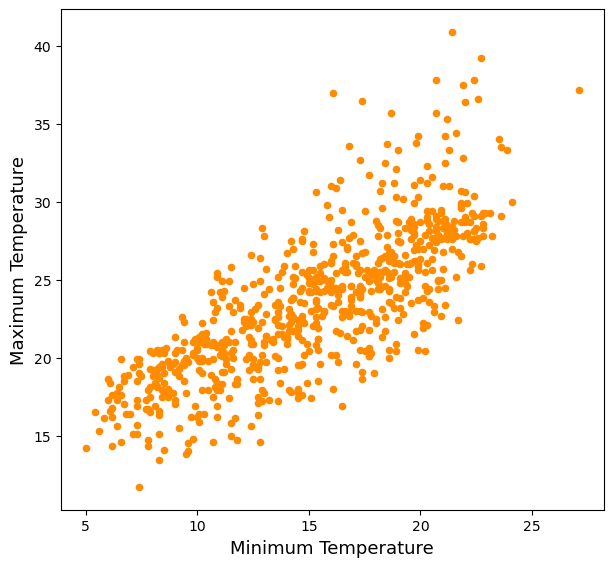

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7, 6.5))

ax = plt.scatter(data[:,0], data[:,1], color="darkorange", s=20)
plt.xlabel("Minimum Temperature", fontsize=13)
plt.ylabel("Maximum Temperature", fontsize=13)

### Task 4

Create a new version of the dataset which consists only of the two three columns of the original dataset (i.e. MinTemp, MaxTemp), and where all values with a value < 10 have been set to 10.

In [8]:
data2 = data[:,0:2]
data2.shape

data2[data2<10] = 10

print("Range is [%.1f, %.1f]" % (data2.min(), data2.max()))

Range is [10.0, 40.9]


### Task 5

Normalise the new version of the data by dividing the values in each column by the mean value for that column. Then display updated summary statistics for the data.

In [11]:
col_mean = data2.mean(axis=0)

data3 = data2/col_mean

print("Range is [%.1f, %.1f]" % (data3.min(), data3.max()))
print("Mean is %.1f" % data3.mean() )
print("Standard deviation is %.1f" % data3.std())

Range is [0.5, 1.7]
Mean is 1.0
Standard deviation is 0.2


### Task 6

Export the final version of the data as a comma-separated text file, where values are stored rounded to 2 decimal places.

In [13]:
np.savetxt("temperature-modified.csv", data3, "%.2f", ",")